# Open CV, Pillow, Pytesseract Test Project #
This is a project derived from one of the assignment I made on the Python 3 Programming Specialization from Coursera.

This applies the use of Pillow, OpenCV, and Pytesseract to extract faces and text from images.

The test images were from the PNG files provided by Vaibhav Bria (https://www.kaggle.com/immvab/document-object-detection).  Those were then placed to a ZIP file to save space in processing. 

The image data, faces and text will be stored to a dictionary.

### 1. Set up the classifier and then store the image data ###
The classifier needs to be initialized to determine how it detects faces.  Image data needs to be stored to be able to draw faces as output.

In [1]:
import zipfile
from PIL import Image, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
images_file_name = "test_images.zip"
images_dict = {}

# opening the zip file in READ mode 
with zipfile.ZipFile(images_file_name, 'r') as zip:
    print("Starting to store image data to dictionary ...")
    for info in zip.infolist(): 
        print("Storing", info.filename) 
        images_dict[info.filename] = dict()
        with zip.open(info) as imgfile:
            img = Image.open(imgfile)
            images_dict[info.filename]['image_data'] = img.copy()
print("Done")

Starting to store image data to dictionary ...
Storing 006.png
Storing 007.png
Storing 008.png
Storing 019.PNG
Storing 025.png
Storing 027.png
Done


### 2. Store the face data ###
Face data are stored as coordinates. After classifier initialization, the faces detected depends on the parameter values used in the detectMultiScale function.

In [2]:
print("Starting to store image data to dictionary ...")
for fname in images_dict.keys():
    print("Storing faces of", fname)
    open_cv_version = images_dict[fname]['image_data'].convert("L")
    open_cv_version.save("tmp.png")
    cv_img = cv.imread("tmp.png")
    faces = face_cascade.detectMultiScale(cv_img, scaleFactor=1.4, minNeighbors=2)
    images_dict[fname]['faces'] = faces
print("Done")

Starting to store image data to dictionary ...
Storing faces of 006.png
Storing faces of 007.png
Storing faces of 008.png
Storing faces of 019.PNG
Storing faces of 025.png
Storing faces of 027.png
Done


#### Just to view the faces found in each image ####

Faces in 006.png


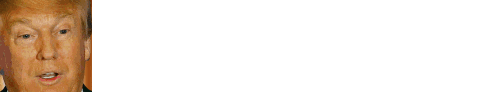

Faces in 007.png


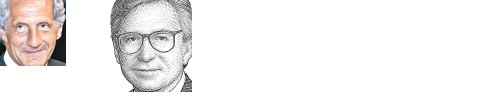

Faces in 008.png


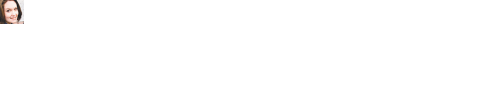

Faces in 019.PNG


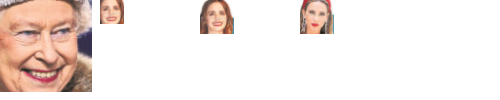

Faces in 025.png
But there were no faces found in that file!
Faces in 027.png
But there were no faces found in that file!


In [3]:
for fname in images_dict.keys():
    print("Faces in", fname)
    out_images_dict = []
    temp_drawing = images_dict[fname]['image_data'].copy()
    for x,y,w,h in images_dict[fname]['faces']:
        temp_img = temp_drawing.crop((x,y,x+w,y+h))
        if w > 100:
            temp_img = temp_img.resize((100,100))
        out_images_dict.append(temp_img)
    if len(out_images_dict) == 0:
        print("But there were no faces found in that file!")
    else:
        if (len(out_images_dict) % 5):
            contact_sheet = Image.new(temp_drawing.mode, (500,(int(len(out_images_dict)/5) + 1)*100))
        else:
            contact_sheet = Image.new(temp_drawing.mode, (500,int(len(out_images_dict)/5)*100))

        x_coord = 0
        y_coord = 0

        for img in out_images_dict:
            contact_sheet.paste(img,(x_coord,y_coord))
            if x_coord + 100 == contact_sheet.width:
                x_coord = 0
                y_coord = y_coord + 100
            else:
                x_coord = x_coord + 100
        display(contact_sheet)

### 3. Store text ###
Store the text to be associated to the current image.

In [4]:
# This will store text of images.zip into the dictionary
print("Starting to store text to dictionary ...")
for fname in images_dict.keys():
    print("Storing text of", fname)
    txt = pytesseract.image_to_string(images_dict[fname]['image_data'])
    images_dict[fname]['text'] = txt
print("Done")

Starting to store text to dictionary ...
Storing text of 006.png
Storing text of 007.png
Storing text of 008.png
Storing text of 019.PNG
Storing text of 025.png
Storing text of 027.png
Done


### 4. Showing the dictionary ###

In [6]:
images_dict

{'006.png': {'image_data': <PIL.Image.Image image mode=RGBA size=694x520 at 0x23F53006D30>,
  'faces': array([[328, 301,  92,  92]], dtype=int32),
  'text': 'The Boston Globe\n\nDEPORTATIONS TO BEGIN\n\nPresident Trump calls for tripling oF ICE fore ‘ots\n“Markets\n\n  \n\x0c'},
 '007.png': {'image_data': <PIL.Image.Image image mode=RGBA size=1095x651 at 0x23F530C4850>,
  'faces': array([[452,  30,  66,  66],
         [653, 478,  92,  92]], dtype=int32),
  'text': 'Loan Pullback\nAdds to Gloom\n\nOver Housing\nTHE OUTLOOK | A2\n\n \n\n \n\nJoseph Abboud\nFashions Label\nSans His Name f{\n\nMARKETPLACE | BL\n\n \n  \n\nHow Well Do\nTarget Funds\nHit the Mark?\n\nINVESTING IN FUNDS | RL\n\n_ THE WALL STREET JOURNAL.\n\nMONDAY, AUGUST 6, 2007 - VOL. CCL NO. 30\n\nkee $1.50\n\n \n\nLast week: DJIA 13181.91 ¥ 83:56 -0.6% NASDAQ 2511.25 ¥20% NIKKEI 16979.86 V18% DJ STOXX50 3718.31 VO1% 10-YR TREASURY 22/32, yield 4698% OIL $75.48 VS154 EURO $13708 YEN 118.05\n\n \n\n \n\nWhat’s News—\n\nBusi

### 5. Function to output faces in an image where a keyword appears ###
This function is used to output the faces in a contact sheet if the keyword appears on that image.

In [5]:
def find_keywd_in_pics_then_print_result(keywd, indict):
    for fname in indict.keys():
        out_images_dict = []
        if keywd in images_dict[fname]['text']:
            print("Results found in file", fname)
            temp_drawing = indict[fname]['image_data'].copy()
            for x,y,w,h in indict[fname]['faces']:
                temp_img = temp_drawing.crop((x,y,x+w,y+h))
                if w > 100:
                    temp_img = temp_img.resize((100,100))
                out_images_dict.append(temp_img)
            if len(out_images_dict) == 0:
                print("But there were no faces detected in that file!")
            else:
                if (len(out_images_dict) % 5):
                    contact_sheet = Image.new(temp_drawing.mode, (500,(int(len(out_images_dict)/5) + 1)*100))
                else:
                    contact_sheet = Image.new(temp_drawing.mode, (500,int(len(out_images_dict)/5)*100))

                x_coord = 0
                y_coord = 0

                for img in out_images_dict:
                    contact_sheet.paste(img,(x_coord,y_coord))
                    if x_coord + 100 == contact_sheet.width:
                        x_coord = 0
                        y_coord = y_coord + 100
                    else:
                        x_coord = x_coord + 100
                display(contact_sheet)

#### Testing out the function ####

Results found in file 007.png


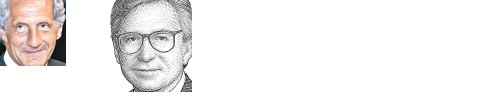

Results found in file 008.png


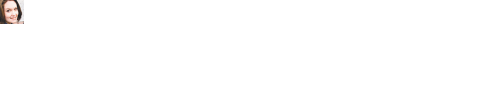

Results found in file 019.PNG


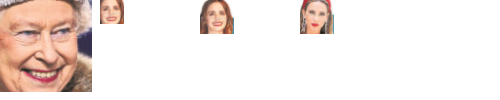

Results found in file 027.png
But there were no faces detected in that file!


In [7]:
# Find "of" in images.zip as in example
find_keywd_in_pics_then_print_result("of", images_dict)